In [11]:
#Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

# Read data
df = pd.read_csv(r'C:\Users\sarin\Desktop\filmsS.csv')

df.head()

#Data cleaning + formatting
#Checking for missing data

for col in df.columns:
    count_missing = df[col].isnull().sum().sum()
    print('{} - {}'.format(col, count_missing))
    







name - 0
rating - 77
genre - 0
year - 0
released - 2
score - 3
votes - 3
director - 0
writer - 3
star - 1
country - 3
budget - 2171
gross - 189
company - 17
runtime - 4


In [12]:
#Data types columns 

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [13]:
df = df.dropna()

In [14]:
#Changing the data types for the columns

df['budget'] = pd.to_numeric(df['budget'], errors='coerce').fillna(0).astype(int)
df['gross'] = pd.to_numeric(df['gross'], errors='coerce').fillna(0).astype(int)
df['votes'] = pd.to_numeric(df['votes'], errors= 'coerce').fillna(0).astype(int)

In [44]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [16]:
#Create correct year column

df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)


In [30]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [38]:
pd.set_option('display.max_rows', None)

In [23]:
#Drop duplicates
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0,2020
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0,2020
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0,2020
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0,2020


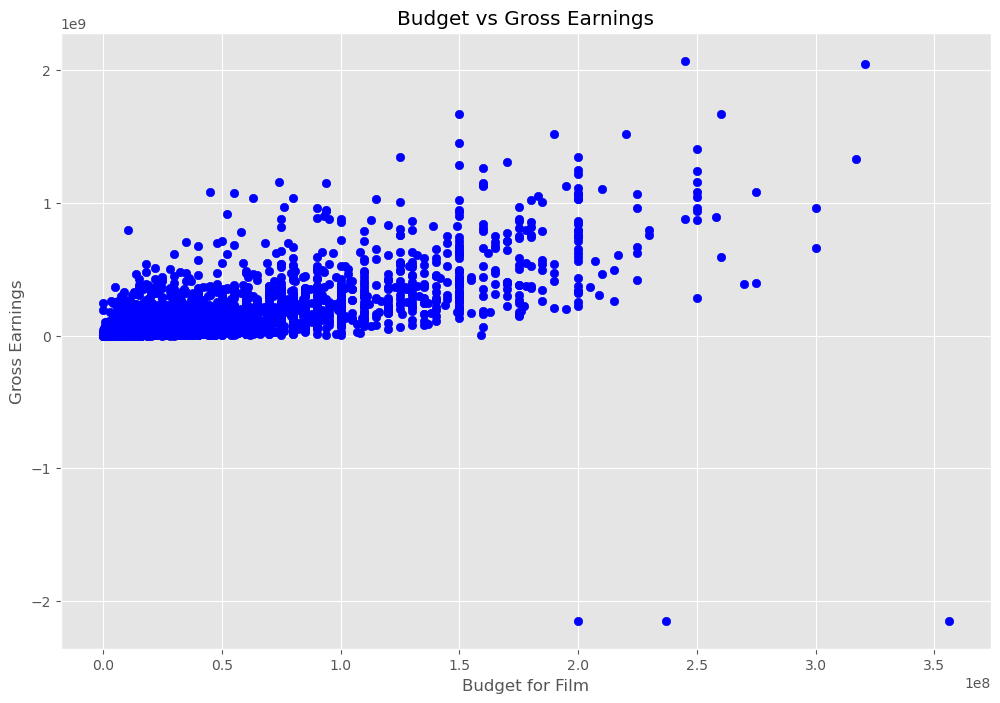

In [58]:
#Scatter graph with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'], c="blue")

plt.title('Budget vs Gross Earnings')

plt.xlabel('Budget for Film')

plt.ylabel('Gross Earnings')

#plt.ylim(0,)
plt.show()



In [31]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118.0,2019
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7.0,593000,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124.0,2015
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8.0,1300000,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143.0,2012


<Axes: xlabel='budget', ylabel='gross'>

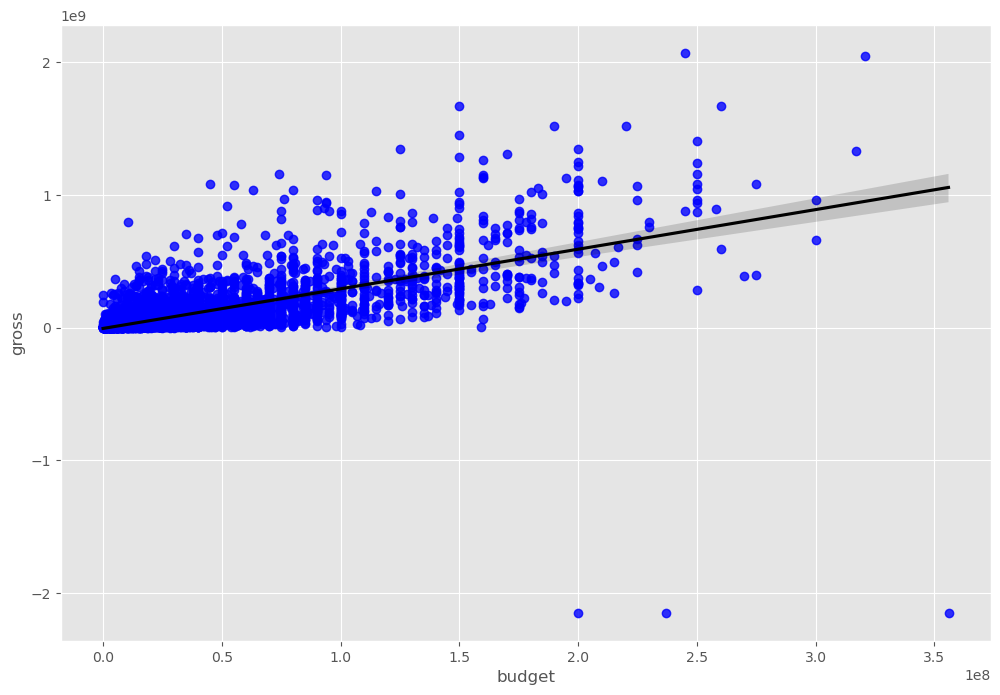

In [40]:
#Plot budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "blue"}, line_kws={"color":"black"})


In [48]:
#Pearson correlation
df.corr( method= 'pearson', numeric_only=True)

,year,score,votes,budget,gross,runtime,yearcorrect
year,1.000000,0.056386,0.206021,0.327722,0.267631,0.075077,0.998726
score,0.056386,1.000000,0.474256,0.072001,0.201086,0.414068,0.061923
votes,0.206021,0.474256,1.000000,0.439675,0.550649,0.352303,0.203098
budget,0.327722,0.072001,0.439675,1.000000,0.669203,0.318695,0.320312
gross,0.267631,0.201086,0.550649,0.669203,1.000000,0.223667,0.262186
runtime,0.075077,0.414068,0.352303,0.318695,0.223667,1.000000,0.075294
yearcorrect,0.998726,0.061923,0.203098,0.320312,0.262186,0.075294,1.000000


In [52]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118.0,2019
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7.0,593000,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124.0,2015
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8.0,1300000,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143.0,2012


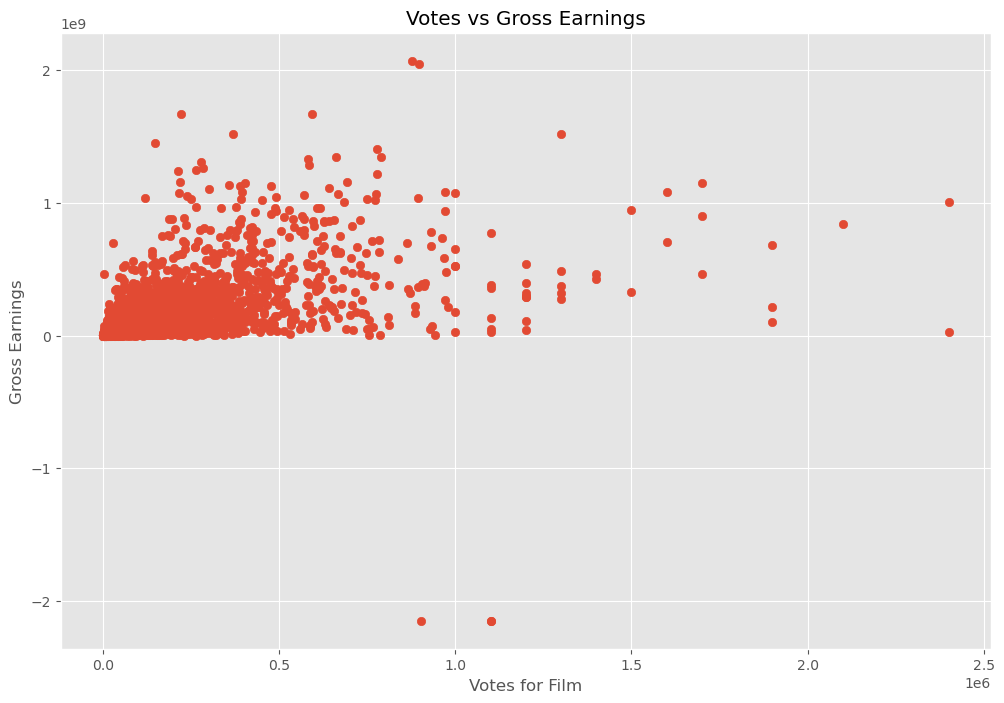

In [53]:
#Scatter graph with votes vs gross

plt.scatter(x=df['votes'], y=df['gross'])

plt.title('Votes vs Gross Earnings')

plt.xlabel('Votes for Film')

plt.ylabel('Gross Earnings')

#plt.ylim(0,)
plt.show()

<Axes: xlabel='votes', ylabel='gross'>

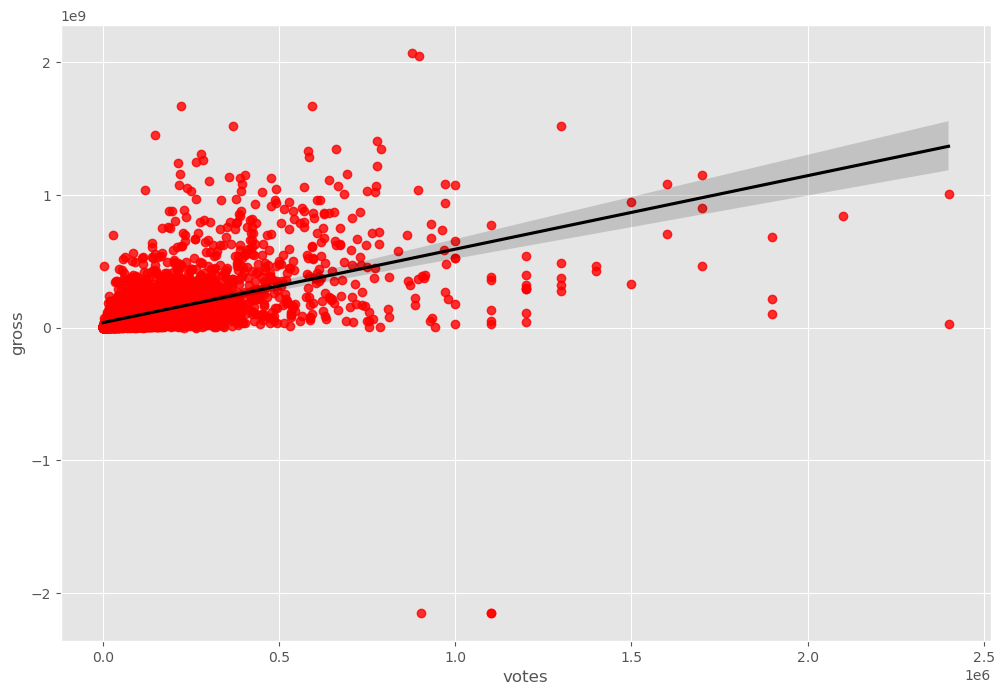

In [54]:
#Plot votes vs gross using seaborn

sns.regplot(x='votes', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color":"black"})

In [76]:
df_noyearcorrect = df.copy()

In [77]:
df_noyearcorrect.drop(columns=['yearcorrect'], inplace = True)

In [78]:

#Pearson correlation
df_noyearcorrect.corr( method= 'pearson', numeric_only=True)

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.267631,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.201086,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.550649,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.669203,0.318695
gross,0.267631,0.201086,0.550649,0.669203,1.000000,0.223667
runtime,0.075077,0.414068,0.352303,0.318695,0.223667,1.000000


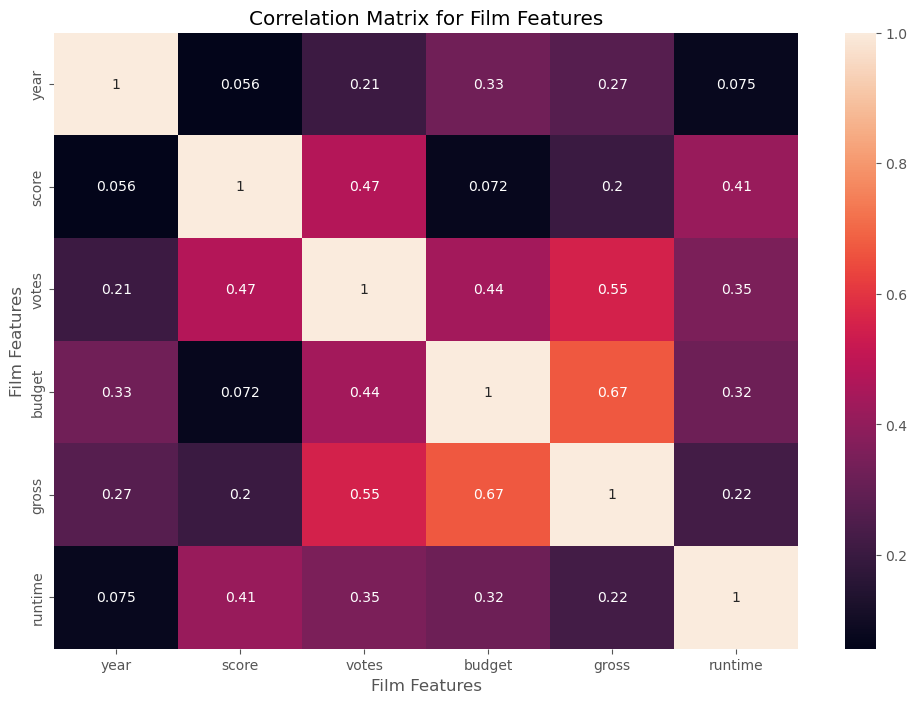

In [81]:
#Correlation matrix 
correlation_matrix_corrected = df_noyearcorrect.corr( method= 'pearson', numeric_only=True)

sns.heatmap(correlation_matrix_corrected, annot=True)

plt.title('Correlation Matrix for Film Features')
plt.xlabel('Film Features')
plt.ylabel('Film Features')
plt.show()

In [46]:
# Calculate mean revenue by country
mean_revenue_by_country = df.groupby('country')['gross'].mean().reset_index()
mean_revenue_by_country.sort_values('gross', ascending= False).head()

,country,gross
29,Malta,3.527941e+08
32,New Zealand,3.487975e+08
13,Finland,2.500630e+08
8,China,2.425353e+08
38,South Africa,1.379522e+08


In [47]:
# Data analysis: Calculate mean revenue for each company
mean_revenue_by_company = df.groupby('company')['gross'].mean().reset_index()
mean_revenue_by_company.sort_values('gross', ascending= False).head()

,company,gross
820,Illumination Entertainment,1.097122e+09
628,Fairview Entertainment,9.665549e+08
190,B24,8.806815e+08
182,Avi Arad Productions,8.560852e+08
983,Marvel Studios,8.433840e+08


In [91]:
df.drop(columns=['mean_revenue'], inplace=True)

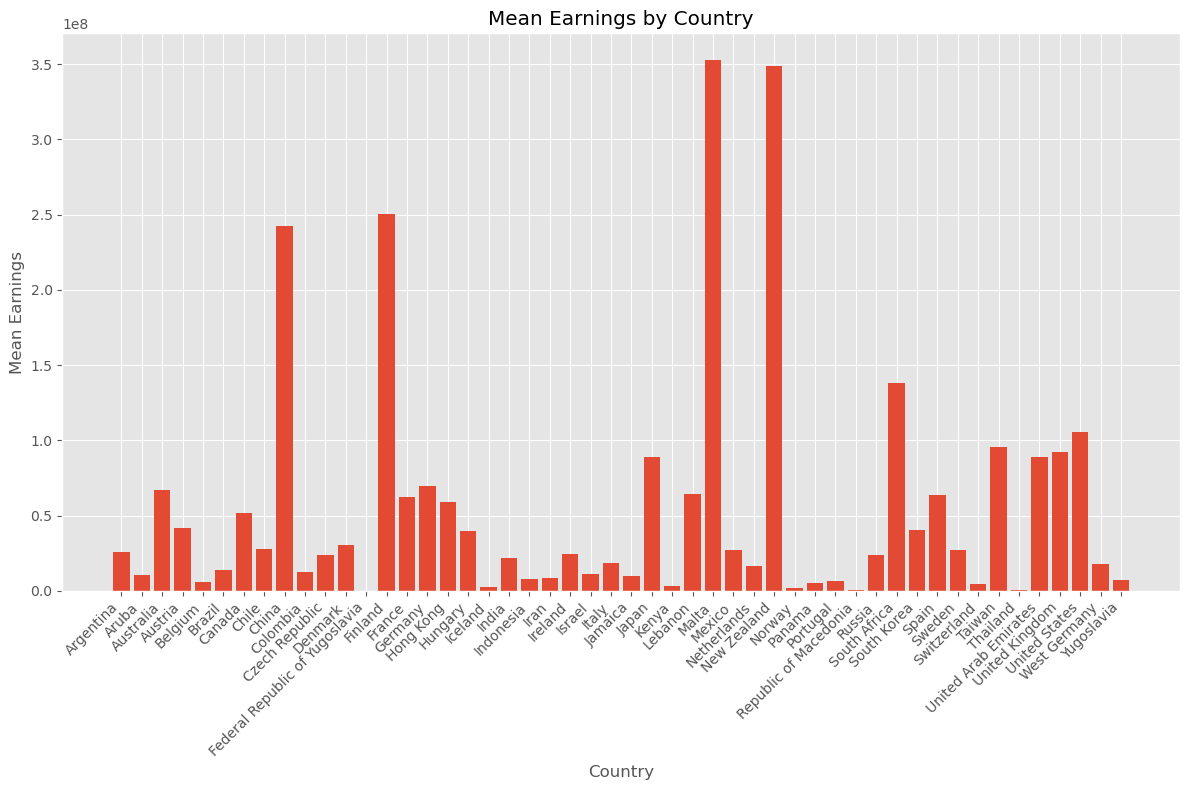

In [98]:
# Bar chart with country vs mean revenue
plt.bar(x=mean_revenue_by_country['country'], height=mean_revenue_by_country['gross'])

plt.title('Mean Earnings by Country')
plt.xlabel('Country')
plt.ylabel('Mean Earnings')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [ ]:
# Bar chart with company vs mean revenue
plt.bar(x=mean_revenue_by_company['company'], height=mean_revenue_by_company['gross'], color="green")

plt.title('Mean Earnings by Company')
plt.xlabel('Company')
plt.ylabel('Mean Earnings')

plt.xticks(rotation=45, ha='right')

plt.show()

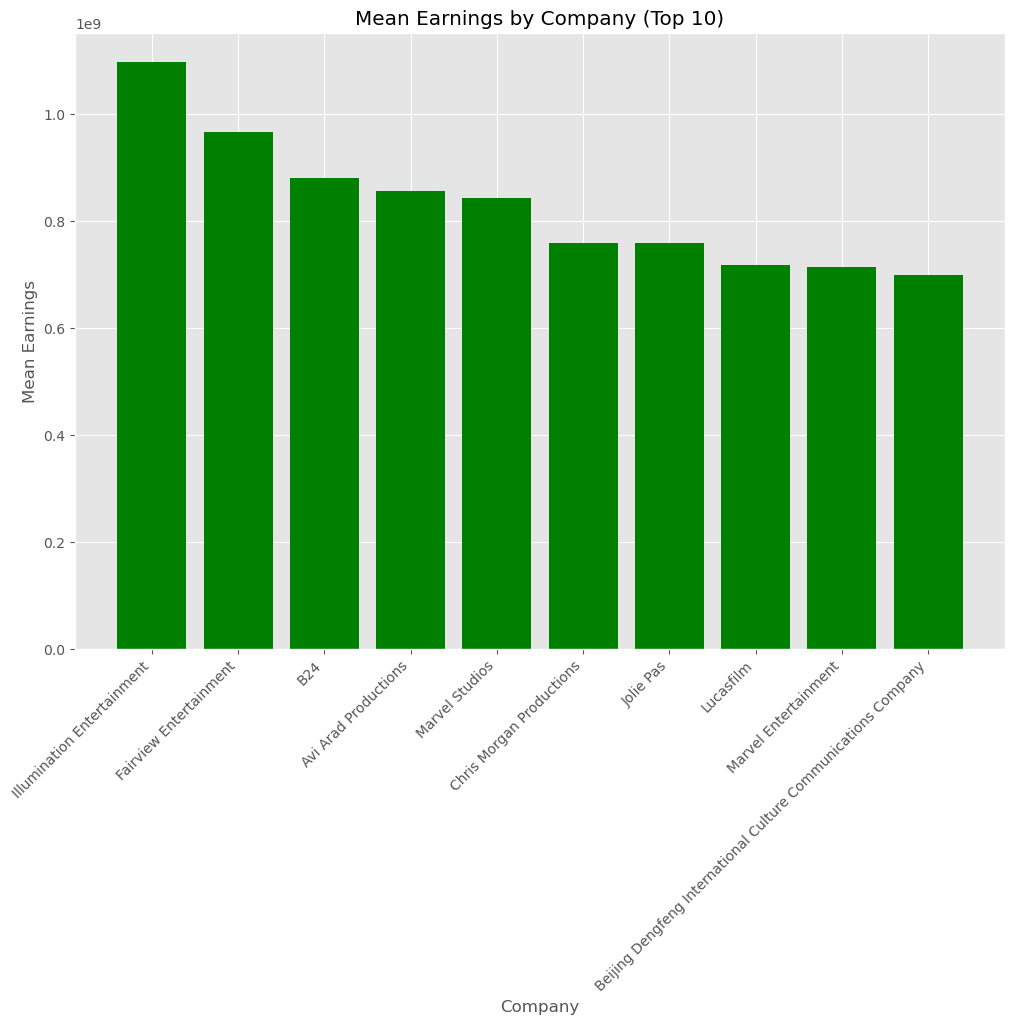

In [42]:
sorted_mean_revenue = mean_revenue_by_company.sort_values(by='gross', ascending=False)

top_10_companies = sorted_mean_revenue.head(10)

# Bar chart with company vs mean revenue for top 10 companies
plt.bar(x=top_10_companies['company'], height=top_10_companies['gross'], color="green")

plt.title('Mean Earnings by Company (Top 10)')
plt.xlabel('Company')
plt.ylabel('Mean Earnings')

plt.xticks(rotation=45, ha='right')

plt.show()